# Exploratory Data Analysis (EDA). Retail Industry
## Total Sales by Category and Subcategory (Top 12)


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Loading the dataset

In [2]:
# Loads the dataset
dataframe_retail = pd.read_csv('data/dataset.csv')

### Exploratory Analysis

In [3]:
# Checking for duplicated data
dataframe_retail[dataframe_retail.duplicated()]

,OrderId,OrderDate,CustomerId,Segment,Country,City,State,ProductId,Category,SubCategory,TotalOrderValue


In [4]:
# Checking for missing values
dataframe_retail.isnull().sum()

OrderId            0
OrderDate          0
CustomerId         0
Segment            0
Country            0
City               0
State              0
ProductId          0
Category           0
SubCategory        0
TotalOrderValue    0
dtype: int64

In [5]:
dataframe_retail.head()

,OrderId,OrderDate,CustomerId,Segment,Country,City,State,ProductId,Category,SubCategory,TotalOrderValue
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


### Determine the total sales for each category and subcategory, considering only the top 12 subcategories, and visualize the results using a single chart.

In [6]:
# Group by category and subcategory, then calculate the sum only for numeric values
dataframe_retail_total_sales = dataframe_retail.groupby(['Category','SubCategory']).sum(numeric_only= True).sort_values('TotalOrderValue', ascending= False). head(12)

In [7]:
dataframe_retail_total_sales

TotalOrderValue
Category        SubCategory                 
Technology      Phones           325271.2940
Furniture       Chairs           317919.6250
Office Supplies Storage          216188.3620
Furniture       Tables           202083.3600
Office Supplies Binders          194723.3810
Technology      Machines         189238.6310
                Accessories      162791.3620
                Copiers          146248.0940
Furniture       Bookcases        108045.0467
Office Supplies Appliances       104061.6930
Furniture       Furnishings       88862.7700
Office Supplies Paper             76312.7640

In [8]:
# Convert TotalOrdeValue to integer and order by category.
dataframe_retail_total_sales = dataframe_retail_total_sales[['TotalOrderValue']].astype(int).sort_values(by = 'Category').reset_index()

In [9]:
dataframe_retail_total_sales

,Category,SubCategory,TotalOrderValue
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [10]:
# Create another dataframe for categories
dataframe_retail_categories = dataframe_retail_total_sales.groupby('Category').sum(numeric_only = True).reset_index()

In [11]:
dataframe_retail_categories

,Category,TotalOrderValue
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [12]:
# color pallete
category_colors = ['#5d00de',
                   '#0ee84f',
                   '#e80e27']

subcategories_colors = ['#aa8cd4',
                        '#aa8cd5',
                        '#aa8cd6',
                        '#aa8cd7',
                        '#26c957',
                        '#26c958',
                        '#26c958',
                        '#26c960',
                        '#e65e65',
                        '#e65e66',
                        '#e65e67',
                        '#e65e68']

In [16]:
# Sample function for autopct formatting
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(pct * total / 100.0)
        return f'{pct:.1f}%\n({val:d})'
    return my_format

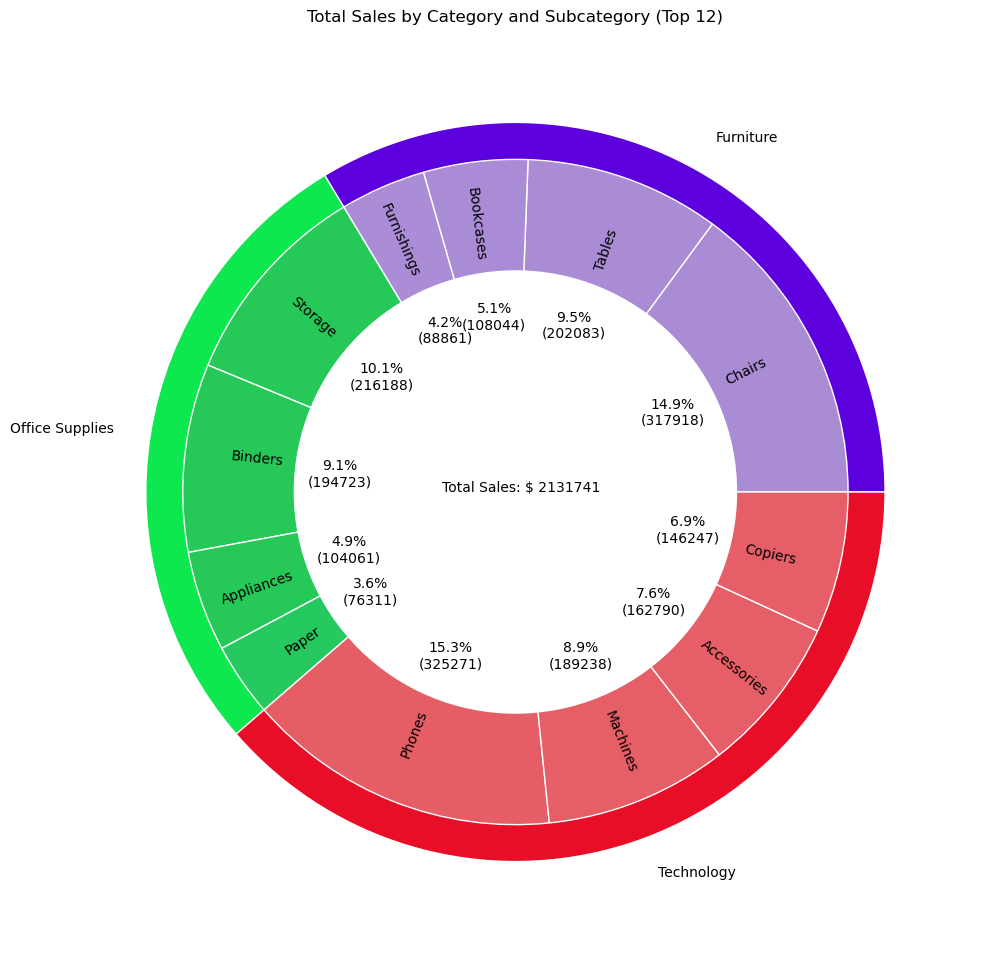

In [18]:
# Plot

fig, ax = plt.subplots(figsize = (18,12))

# Categores chart
p1 = ax.pie(dataframe_retail_categories['TotalOrderValue'],
            radius = 1,
            labels = dataframe_retail_categories['Category'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = category_colors)

# Subcategories chart
p2 = ax.pie(dataframe_retail_total_sales['TotalOrderValue'],
            radius = 0.9,
            labels = dataframe_retail_total_sales['SubCategory'],
            autopct = autopct_format(dataframe_retail_total_sales['TotalOrderValue']),
            colors = subcategories_colors,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'),
            pctdistance = 0.53,
            rotatelabels = True)

# Clear center of circle
center_circle = plt.Circle((0,0),0.6, fc = 'white')

# Labels
fig.gca().add_artist(center_circle)
plt.annotate(text = 'Total Sales: ' + '$ ' + str(int(sum(dataframe_retail_total_sales['TotalOrderValue']))), xy = (-0.2,0))
plt.title('Total Sales by Category and Subcategory (Top 12)')
plt.show()